# INTRODUCTION


From google playstore dataset,iam doing EDA and data visualisation for predicting the ratings of applications and gathering some important insights


# Import necessary libraries

In [411]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

# load the data

In [412]:
data = pd.read_csv("C:/Users/kamalesh reddy/Downloads/googleplaystore.csv")

In [413]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [414]:
data.shape

(10841, 13)

we are having 10841 rows of data with 13 features(columns)

In [415]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [416]:
data.dtypes.value_counts()

object     12
float64     1
dtype: int64

data has 12 objects and 1 numerical feature i.e rating

In [417]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

we are having high number of null values in "rating" column and less number of null values in "type","content rating","current ver" and "android ver" columns

lets see percentage of these null values in these columns

In [418]:
total_null = data.isnull().sum().sort_values(ascending = False)
percentage_null = ((data.isnull().sum())/data.isnull().count()).sort_values(ascending = False)
pd.concat([total_null,percentage_null],axis=1,keys=["total","percent"]).head()

,total,percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092


13.6% of values in rating are missing

In [419]:
data.dropna(how = "any",inplace=True)

we dropped the missing values

In [420]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Now we are having no null values

In [421]:
data.shape

(9360, 13)

After removing null values our data contains 9360 records with 13 features

# Type

In [422]:
data["Type"].value_counts()

Free    8715
Paid     645
Name: Type, dtype: int64

we are having 8715 free applications and 645 paid applications in playstore

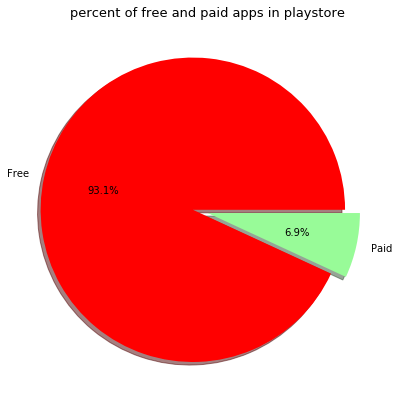

In [423]:
labels = data["Type"].value_counts(sort=True).index
sizes = data["Type"].value_counts(sort=True)
colors = ["Red","palegreen"]
explode = (0.1,0)
rcParams["figure.figsize"] = 7,7
plt.pie(sizes,explode=explode,labels=labels,colors=colors,shadow=True,autopct='%1.1f%%')
plt.title("percent of free and paid apps in playstore",size=13)
plt.show()

Most of the apps in playstore are free(93.1%)

In [424]:
free_rat = data[data["Type"]=="Free"]["Rating"]
paid_rat = data[data["Type"]=="Paid"]["Rating"]
print("average rating of free applications",(free_rat).mean())
print("average rating of paid applications",(paid_rat).mean())

average rating of free applications 4.186288009179587
average rating of paid applications 4.266821705426354


some how paid applications are having more average rating when compared to free applications

# Rating

In [425]:
data["Rating"].describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Distribution of rating')

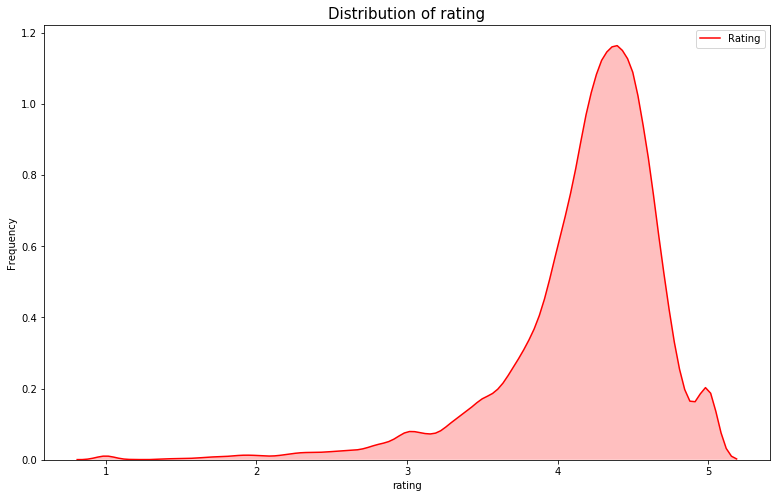

In [426]:
rcParams["figure.figsize"] = 13,8
sns.kdeplot(data["Rating"],color="Red",shade=True)
plt.xlabel("rating")
plt.ylabel("Frequency")
plt.title("Distribution of rating",size=15)

Average rating of application in playstore is found around 4,which is very high

In [427]:
data["Rating"].mean()

4.191837606837612

Average rating of all applications in playstore is 4.19

# category

In [428]:
data["Category"].nunique()

33

we are having 33 categories of applications in playstore

In [429]:
data["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

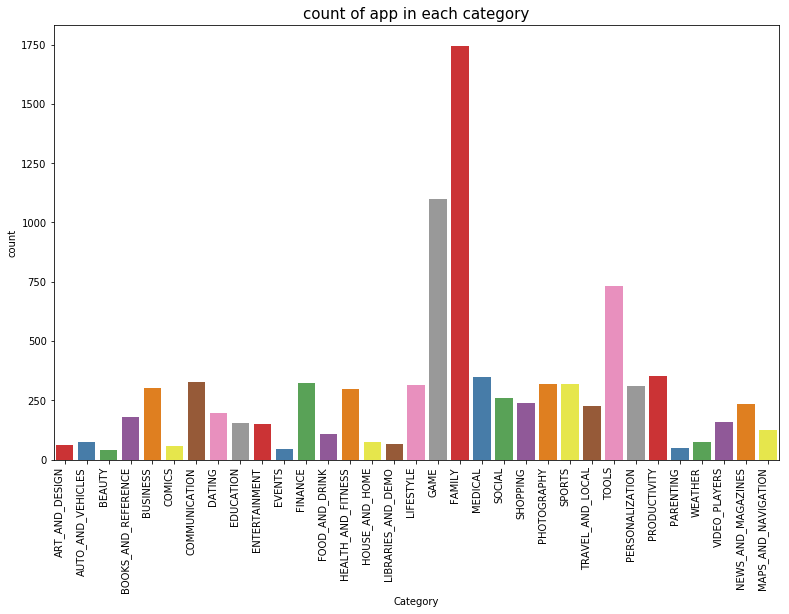

In [430]:
p = sns.countplot(x = "Category",data=data,palette="Set1")
p.set_xticklabels(p.get_xticklabels(),rotation=90,ha="right")
plt.title("count of app in each category",size=15)
p

"Family" and "Game" categories of applications are found more in playstore

Text(0.5, 1.0, 'boxplot of rating vs category')

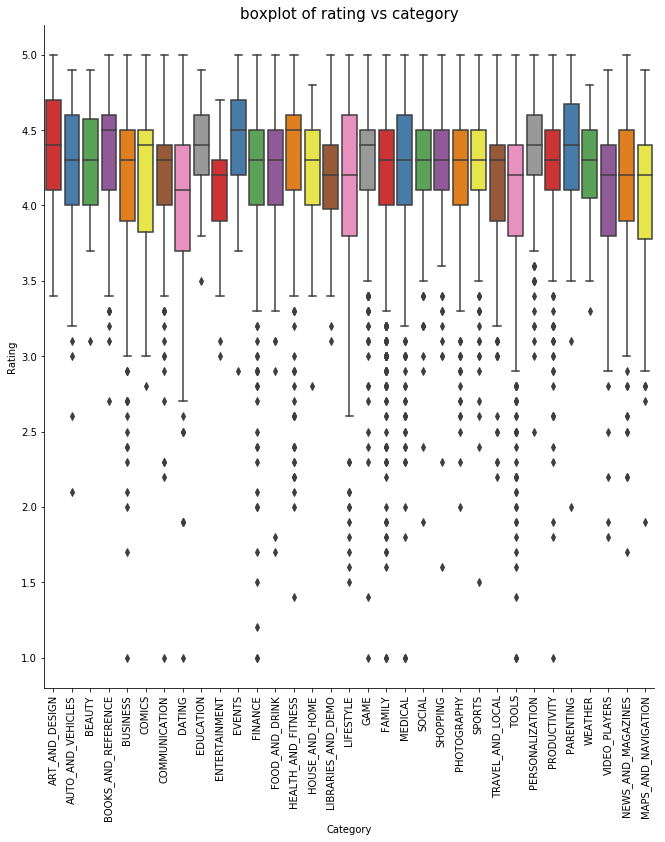

In [431]:
p = sns.catplot(x="Category",y="Rating",data=data,palette="Set1",kind="box",height=10)
p.set_xticklabels(rotation=90)
plt.title("boxplot of rating vs category",size=15)

In [432]:
data["Category"].nunique()

33

In [433]:
a=data["Category"].unique()

In [434]:
lis=[g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,
     g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32]

Hypothesis testing

H0:- average rating of all categories equal

HA:- average rating of one or more than one categories are not equal

F-one way ANOVA(analysis of variance)

In [435]:
g= data.groupby('Category')
g0=g.get_group(a[0])["Rating"]
g1=g.get_group(a[1])["Rating"]
g2=g.get_group(a[2])["Rating"]
g3=g.get_group(a[3])["Rating"]
g4=g.get_group(a[4])["Rating"]
g5=g.get_group(a[5])["Rating"]
g6=g.get_group(a[6])["Rating"]
g7=g.get_group(a[7])["Rating"]
g8=g.get_group(a[8])["Rating"]
g9=g.get_group(a[9])["Rating"]
g10=g.get_group(a[10])["Rating"]
g11=g.get_group(a[11])["Rating"]
g12=g.get_group(a[12])["Rating"]
g13=g.get_group(a[13])["Rating"]
g14=g.get_group(a[14])["Rating"]
g15=g.get_group(a[15])["Rating"]
g16=g.get_group(a[16])["Rating"]
g17=g.get_group(a[17])["Rating"]
g18=g.get_group(a[18])["Rating"]
g19=g.get_group(a[19])["Rating"]
g20=g.get_group(a[20])["Rating"]
g21=g.get_group(a[21])["Rating"]
g22=g.get_group(a[22])["Rating"]
g23=g.get_group(a[23])["Rating"]
g24=g.get_group(a[24])["Rating"]
g25=g.get_group(a[25])["Rating"]
g26=g.get_group(a[26])["Rating"]
g27=g.get_group(a[27])["Rating"]
g28=g.get_group(a[28])["Rating"]
g29=g.get_group(a[29])["Rating"]
g30=g.get_group(a[30])["Rating"]
g31=g.get_group(a[31])["Rating"]
g32=g.get_group(a[32])["Rating"]

In [436]:
import scipy.stats as stats
from scipy.stats import f_oneway

In [437]:
f_oneway(g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,
     g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32)

F_onewayResult(statistic=9.218613181898506, pvalue=1.6012466439495683e-43)

since we got p value < 0.05 we reject null hypothesis(H0)

so we reject null hypothesis

i.e The average rating among various categories are different

# Reviews

First we have to change the data type of reviews from object to int

In [438]:
data["Reviews"] = data["Reviews"].astype("int")

In [439]:
sort_review = data.sort_values(by="Reviews",ascending=False)
sort_review.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device


Here we can observe that we are having duplicate records. so we have to drop duplicated rows

In [440]:
data.shape

(9360, 13)

In [441]:
data = data.drop_duplicates()

In [442]:
data.shape

(8886, 13)

we have dropped the duplicated rows and now shape reduced to 8886 from 9360,i.e we are having 474 duplicated records

In [443]:
sort_review = data.sort_values(by="Reviews",ascending=False)
sort_review.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1879,Clash of Clans,GAME,4.6,44893888,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up


we are having facebook,whatsapp,instagram having highest number of reviews in social and communication category

And we are having clash of clans and subway surfers having highest number of reviews in game category

In [444]:
data["Reviews"].describe()

count    8.886000e+03
mean     4.730928e+05
std      2.906007e+06
min      1.000000e+00
25%      1.640000e+02
50%      4.723000e+03
75%      7.131325e+04
max      7.815831e+07
Name: Reviews, dtype: float64

Text(0.5, 1.0, 'distribution of reviews')

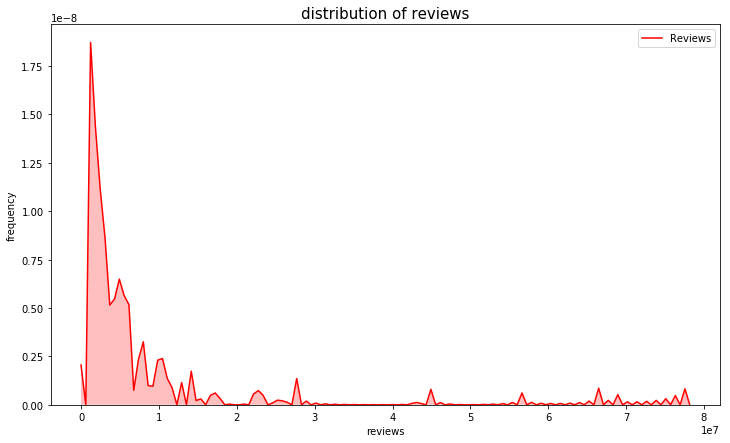

In [445]:
rcParams["figure.figsize"]=12,7
sns.kdeplot(data["Reviews"],color="Red",shade=True)
plt.xlabel("reviews")
plt.ylabel("frequency")
plt.title("distribution of reviews",size=15)

Most of the applications in playstore are having reviews less than 10M

In [446]:
data[data["Reviews"]>50000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


well known applications obviously have lots of reviews

Text(0.5, 1.0, 'reviews vs rating')

<Figure size 1080x720 with 0 Axes>

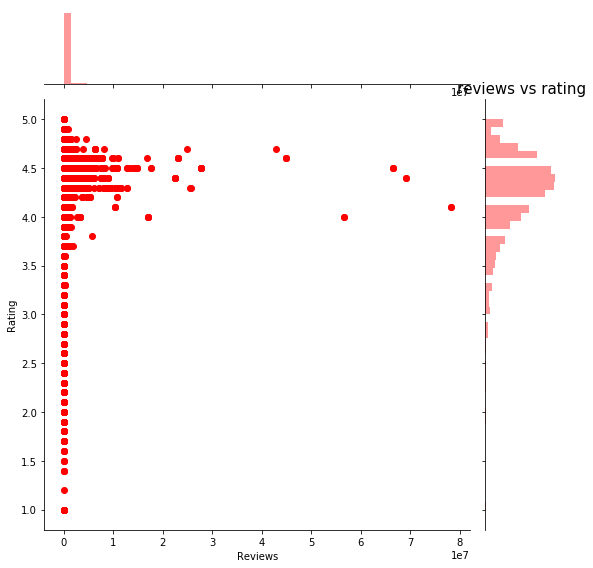

In [447]:
plt.figure(figsize=(15,10))
sns.jointplot(x="Reviews",y="Rating",data=data,color="Red",size=8)
plt.title("reviews vs rating",size=15)

Text(0.5, 1.0, 'reviews vs rating')

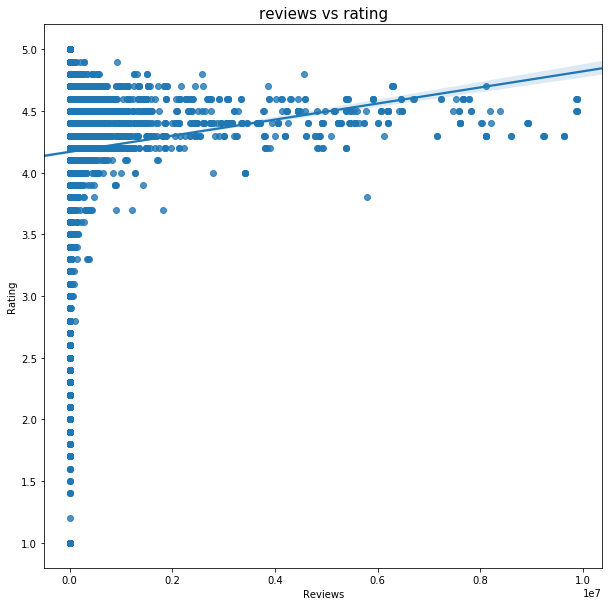

In [448]:
plt.figure(figsize=(10,10))
sns.regplot(x="Reviews",y="Rating",data=data[data["Reviews"]<10000000])
plt.title("reviews vs rating",size=15)

well knows applications have more reviews ,and applications with more reviews has more rating

so rating is positively correlated with reviews

# size

In [449]:
data["Size"].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [450]:
data["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

There are three types of sizes .

1)M

2)K

3) varies with device

In [451]:
len(data[data["Size"]=="Varies with device"])

1468

There are 1468 records with size having "varies with device".we have to replace these records with nan values

In [452]:
data["Size"] = data["Size"].replace("Varies with device",np.nan)

In [453]:
data.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1468
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

Now we are having 1468 null values in size column

In [454]:
data["Size"] = data["Size"].str.replace("M","e+6")
data["Size"] = data["Size"].str.replace("k","e+3")

we have replaced "M" with 1000000 and "k" with 1000

In [455]:
data["Size"] = data["Size"].astype("float")

And changed the data type from object to float

In [456]:
data["Size"].head()

0    19000000.0
1    14000000.0
2     8700000.0
3    25000000.0
4     2800000.0
Name: Size, dtype: float64

But still we have nan values. we should replace the nan values with mean of the Size

In [457]:
data["Size"] = data["Size"].replace(np.nan,data["Size"].mean())

we replaced the nan values with mean

Text(0.5, 1.0, 'size vs rating')

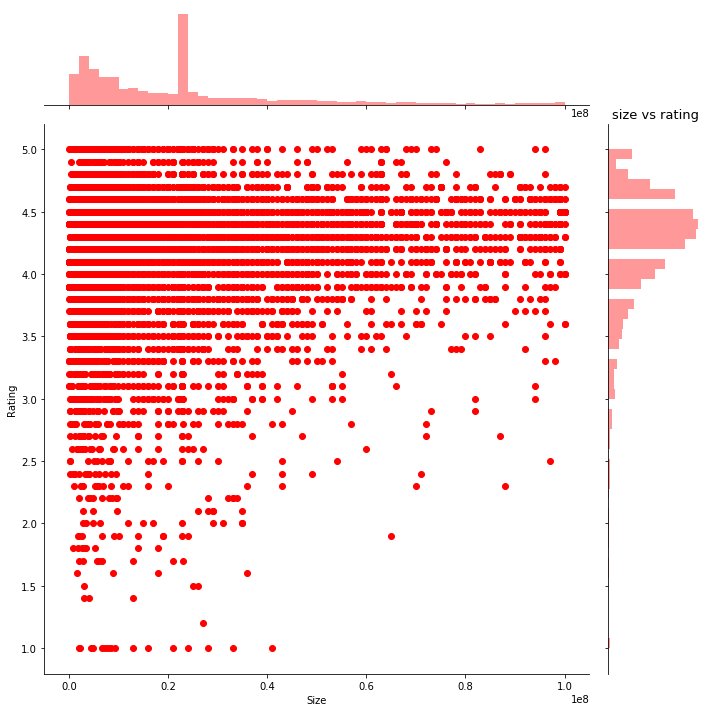

In [458]:
sns.jointplot(x="Size",y="Rating",data=data,color="Red",size=10)
plt.title("size vs rating",size=13)

In [459]:
print("No of apps having size greater than 30MB:-",data[data["Size"]>30000000]["App"].count())
print("No of apps having size less than 30MB:-",(data[data["Size"]<30000000]["App"].count()))

No of apps having size greater than 30MB:- 1989
No of apps having size less than 30MB:- 6828


Most of the apps are sized between 2-30 Mb,neither too light nor too heavy 

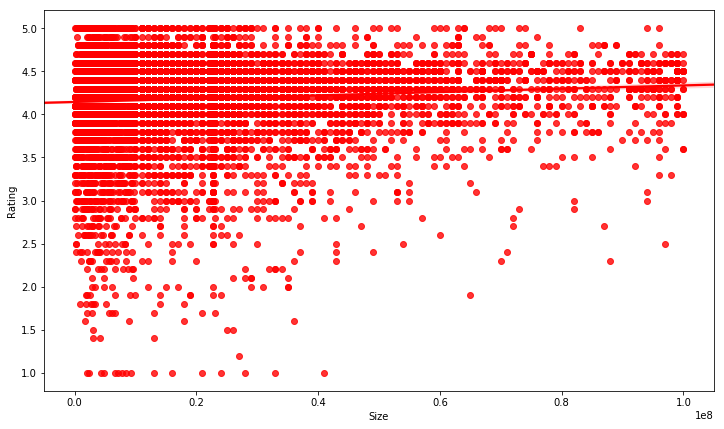

In [460]:
sns.regplot(x="Size",y="Rating",data=data,color="Red")

Text(0.5, 1.0, 'Installs vs size for paid applications')

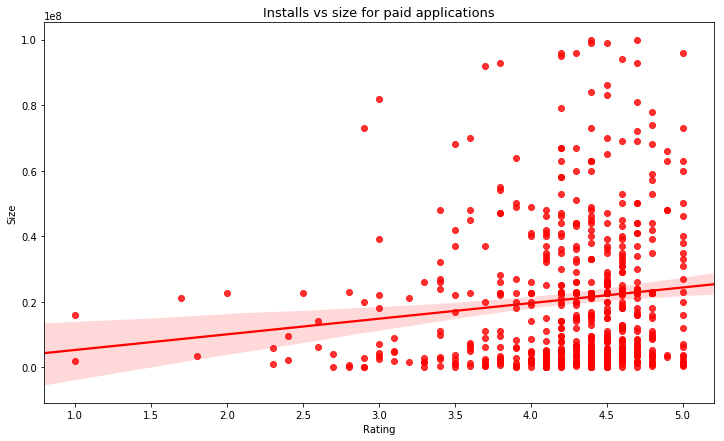

In [461]:
sns.regplot(x="Rating",y="Size",data=data[data["Type"]=="Paid"],color="Red")
plt.title("Installs vs size for paid applications",size=13)

Majority of the paid applications are highly rated and less in size, that means paid apps are designed to meet specific functionality and hence they are not bulky 

# installs

In [462]:
data["Installs"].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

installs data is an object with "+" sign in it

In [463]:
data["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

It contains "," and "+" signs in it. we have to replace these in order to change the datatype to integer

In [464]:
data["Installs"] = data["Installs"].str.replace(",","")
data["Installs"] = data["Installs"].str.replace("+","")
data["Installs"] = data["Installs"].astype("int")

In [465]:
data["Installs"].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1], dtype=int64)

In [466]:
print("Avg installs for an application which are free:",data[data["Type"]=="Free"]["Installs"].mean())
print("Avg installs for an application which are paid:",data[data["Type"]=="Paid"]["Installs"].mean())

Avg installs for an application which are free: 17710601.07021148
Avg installs for an application which are paid: 113193.91489361702


we are having an average of 17.7M installs for an application which are free,where as 0.11M average installs per application which are paid

Encode them as follows

1 to 0

5 to 1

10 to 2 and so on

In [467]:
sort_installs = sorted(list(data["Installs"].unique()))

In [468]:
sort_installs

[1,
 5,
 10,
 50,
 100,
 500,
 1000,
 5000,
 10000,
 50000,
 100000,
 500000,
 1000000,
 5000000,
 10000000,
 50000000,
 100000000,
 500000000,
 1000000000]

In [469]:
data["Installs"] = data["Installs"].replace(sort_installs,range(0,len(sort_installs),1))

In [470]:
data["Installs"].head()

0     8
1    11
2    13
3    15
4    10
Name: Installs, dtype: int64

Text(0.5, 1.0, 'Installs vs rating')

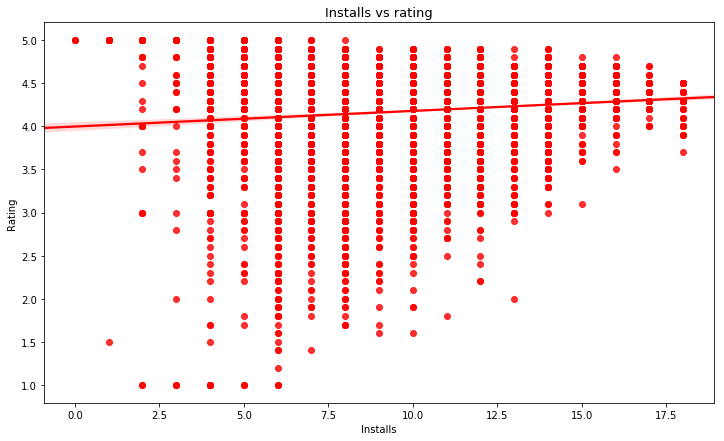

In [471]:
sns.regplot(x="Installs",y="Rating",data=data,color="Red")
plt.title("Installs vs rating",size=13)

No of installs effected by rating

Text(0.5, 1.0, 'Installs vs rating for free applications')

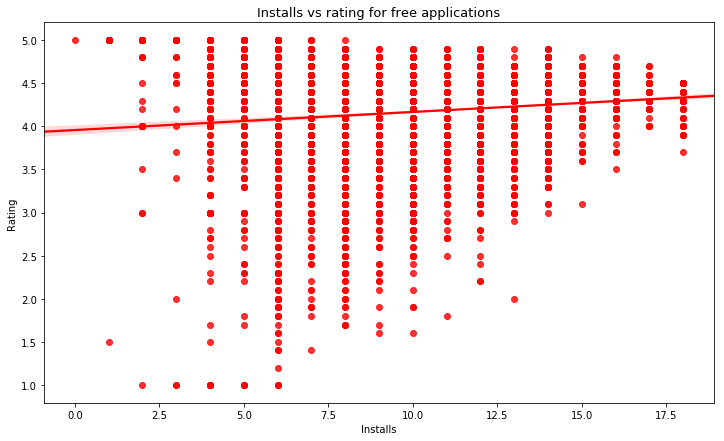

In [472]:
sns.regplot(x="Installs",y="Rating",data=data[data["Type"]=="Free"],color="Red")
plt.title("Installs vs rating for free applications",size=13)

Text(0.5, 1.0, 'Installs vs rating for paid applications')

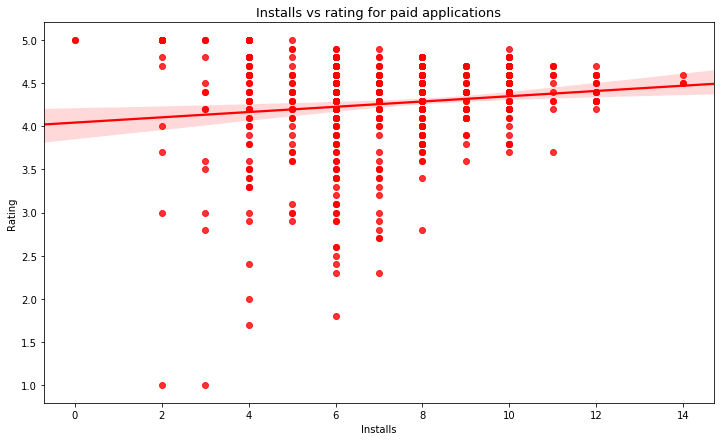

In [473]:
sns.regplot(x="Installs",y="Rating",data=data[data["Type"]=="Paid"],color="Red")
plt.title("Installs vs rating for paid applications",size=13)

# Price

In [474]:
data["Price"].head()

0    0
1    0
2    0
3    0
4    0
Name: Price, dtype: object

In [475]:
data["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

data is in object ,with dollar sign in it

In [476]:
data["Price"] = data["Price"].str.replace("$","")
data["Price"] = data["Price"].astype("float")

In [477]:
data["Price"].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

we removed dollar sign and converted to float

In [478]:
data["Price"].describe()

count    8886.000000
mean        0.963526
std        16.194792
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

Average price of each application is 0.96,but still most of the apps are free

The most expensive app is $400 

In [479]:
data[data["Price"]==400]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,8,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up


In [480]:
pd.DataFrame(data[data["Price"]>200]["App"])

,App
4197,most expensive app (H)
4362,💎 I'm rich
4367,I'm Rich - Trump Edition
5351,I am rich
5354,I am Rich Plus
5355,I am rich VIP
5356,I Am Rich Premium
5357,I am extremely Rich
5358,I am Rich!
5359,I am rich(premium)


These are the junk applications present in playstore

Text(0.5, 1.0, 'price vs rating')

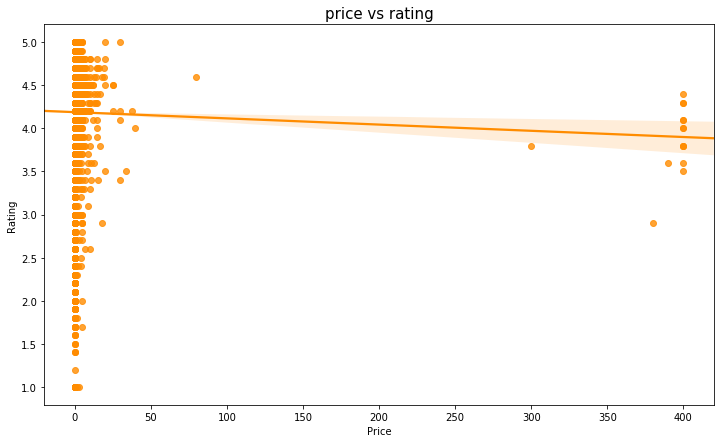

In [481]:
sns.regplot(x="Price",y="Rating",data=data,color="darkorange")
plt.title("price vs rating",size=15)

Most of the apps are price below 50dollars,but there are some apps ranging from 100-400 dollars

But we can see that higher price applications make customers disappointment if they are not good enough

Text(0.5, 1.0, 'boxplot of price vs category')

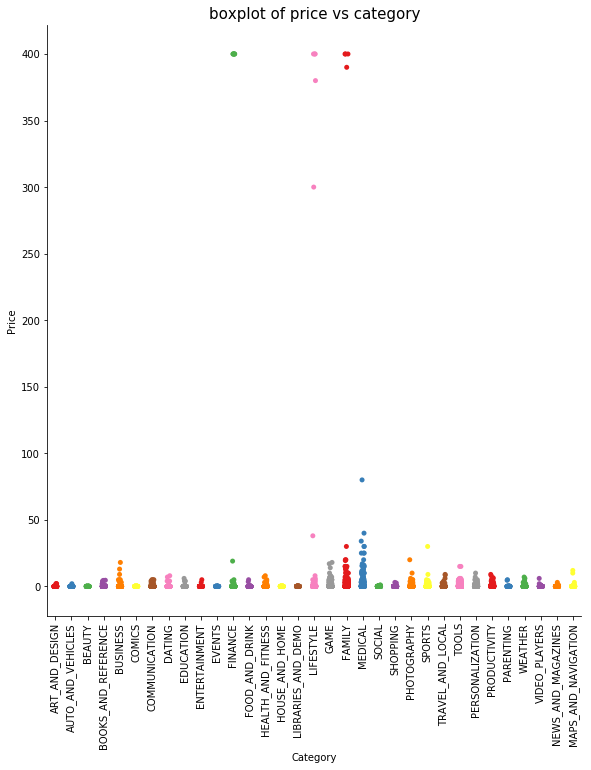

In [482]:
p = sns.catplot(x="Category",y="Price",data=data,palette="Set1",height=9)
p.set_xticklabels(rotation=90)
plt.title("boxplot of price vs category",size=15)

we are having junk applications in lifestyle,entertainment,finance category(i.e price>$200)

let us check which category having more number of paid applications

Text(0.5, 1.0, 'boxplot of price vs category')

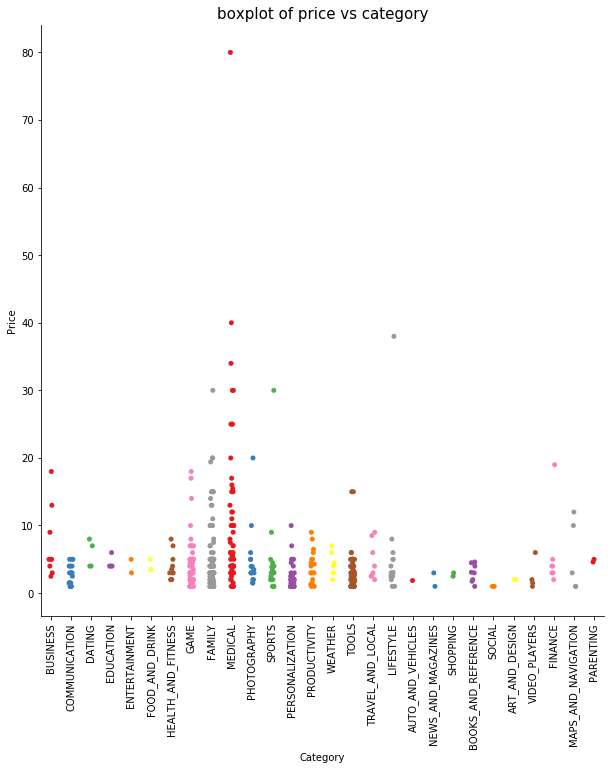

In [483]:
p = sns.catplot(x="Category",y="Price",data=data[(data["Price"]>0)&(data["Price"]<=100)]
                ,palette="Set1",height=9)
p.set_xticklabels(rotation=90)
plt.title("boxplot of price vs category",size=15)

In [484]:
data[(data["Price"]>0)&(data["Price"]<100)]["Category"].value_counts()

FAMILY                 153
GAME                    77
PERSONALIZATION         65
MEDICAL                 64
TOOLS                   63
COMMUNICATION           22
SPORTS                  22
PRODUCTIVITY            18
PHOTOGRAPHY             16
LIFESTYLE               13
HEALTH_AND_FITNESS      11
BUSINESS                 9
TRAVEL_AND_LOCAL         8
BOOKS_AND_REFERENCE      8
FINANCE                  7
WEATHER                  7
MAPS_AND_NAVIGATION      5
EDUCATION                4
DATING                   4
VIDEO_PLAYERS            4
ART_AND_DESIGN           3
ENTERTAINMENT            2
SOCIAL                   2
SHOPPING                 2
PARENTING                2
FOOD_AND_DRINK           2
NEWS_AND_MAGAZINES       2
AUTO_AND_VEHICLES        1
Name: Category, dtype: int64

In [485]:
data[(data["Price"]>0)&(data["Price"]<2)]["Category"].value_counts()

PERSONALIZATION        50
FAMILY                 39
GAME                   34
TOOLS                  24
COMMUNICATION          10
SPORTS                  8
MEDICAL                 7
PRODUCTIVITY            5
PHOTOGRAPHY             4
HEALTH_AND_FITNESS      3
VIDEO_PLAYERS           3
BOOKS_AND_REFERENCE     3
LIFESTYLE               3
ART_AND_DESIGN          3
SOCIAL                  2
MAPS_AND_NAVIGATION     2
WEATHER                 1
FINANCE                 1
NEWS_AND_MAGAZINES      1
AUTO_AND_VEHICLES       1
TRAVEL_AND_LOCAL        1
Name: Category, dtype: int64

In [486]:
data[(data["Price"]>20)&(data["Price"]<100)]["Category"].value_counts()

MEDICAL      8
FAMILY       1
LIFESTYLE    1
SPORTS       1
Name: Category, dtype: int64

cleary we can observe that medical applications are most expensive and some medical applications even tend to $80

we have only one application among lifestyle,family,sports category which are expensive

All the remaining category applications are under $30

surprisingly,all the game applications except 3 are less than (10$) 

only 3 games lies between 10-20$

personalization,game and family category applictions are having more applications which are very economical (<$2)

In [487]:
#let us check the ratings by using price band
data.loc[data["Price"]==0,"priceband"]="0free"
data.loc[(data["Price"]>0)&(data["Price"]<=5),"priceband"]="1economical"
data.loc[(data["Price"]>5)&(data["Price"]<=10),"priceband"]="2not economical"
data.loc[(data["Price"]>10)&(data["Price"]<=30),"priceband"]="3expensive"
data.loc[(data["Price"]>=30),"priceband"]="4mostexpensive"

In [488]:
data[["priceband","Rating"]].groupby(["priceband"],as_index=False).mean()

,priceband,Rating
0,0free,4.182514
1,1economical,4.278296
2,2not economical,4.242623
3,3expensive,4.252632
4,4mostexpensive,3.910526


we can clearly observe that most expensive applications are being rated less by the users(below 4)

And applications that are least paid are rated high among all applications

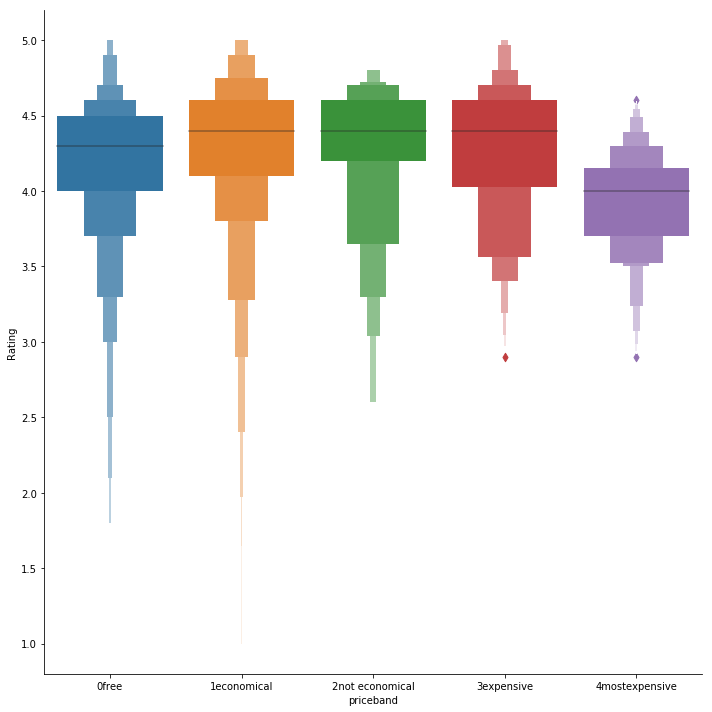

In [489]:
sns.catplot(x="priceband",y="Rating",data=data,kind="boxen",height=10)

Prices are not that much effecting the rating ,but if it is very expensive, it might get low rating

# content rating

In [490]:
data["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

Text(0.5, 1.0, 'boxplot of content rating vs rating')

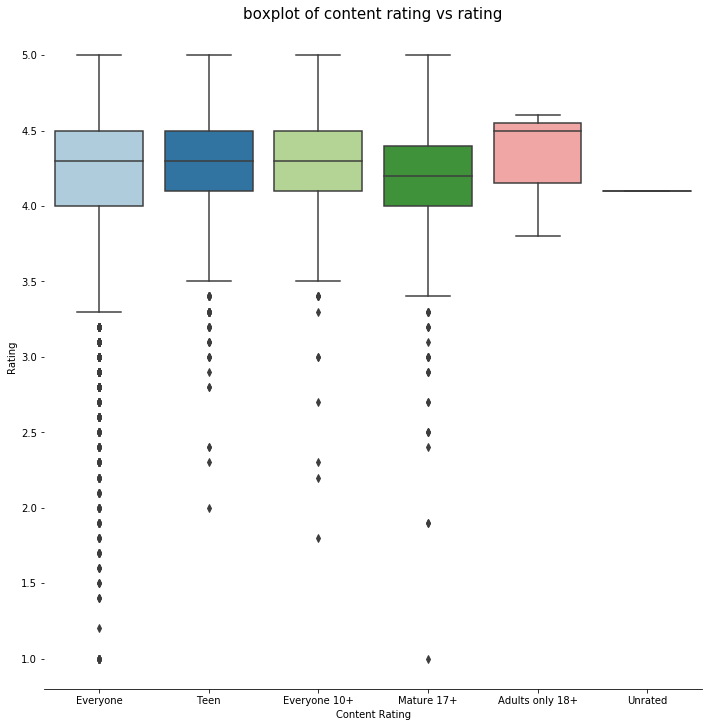

In [491]:
k=sns.catplot(x="Content Rating",y="Rating",data=data,kind="box",palette="Paired",height=10)
k.despine(left=True)
k.set_ylabels("Rating")
plt.title("boxplot of content rating vs rating",size=15)

content rating does not effect the ratings of the applications, but there is a slighty decrease in rating for mature compared to other

In [492]:
#let us check about unrated applications
data[data["Content Rating"]=="Unrated"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,priceband
8266,DC Universe Online Map,TOOLS,4.1,1186,6400000.0,9,Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up,0free


Since there is only one record in the unrated section,we can drop that record if we want

# Genres

In [493]:
data["Genres"].nunique()

115

There are 115 different types of Genres 

In [494]:
data["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [495]:
data["Genres"].value_counts().head(10)

Tools              732
Entertainment      498
Education          446
Action             349
Productivity       334
Finance            317
Personalization    308
Communication      307
Photography        304
Lifestyle          304
Name: Genres, dtype: int64

In [496]:
data["Genres"].value_counts().tail(10)

Racing;Pretend Play                  1
Board;Pretend Play                   1
Arcade;Pretend Play                  1
Adventure;Brain Games                1
Comics;Creativity                    1
Lifestyle;Education                  1
Health & Fitness;Education           1
Casual;Music & Video                 1
Travel & Local;Action & Adventure    1
Parenting;Brain Games                1
Name: Genres, dtype: int64

Many of them contain only one record making it bias,so we can split the genre by splitting at ";" and ignoring sub-genre 

In [497]:
data['Genres']=data['Genres'].str.split(';').str[0]

In [498]:
data["Genres"].value_counts()

Tools                      733
Entertainment              538
Education                  528
Action                     364
Productivity               334
Finance                    317
Personalization            308
Communication              308
Lifestyle                  306
Photography                304
Sports                     303
Medical                    302
Business                   270
Health & Fitness           264
Casual                     255
Social                     244
Arcade                     220
News & Magazines           214
Simulation                 210
Travel & Local             205
Shopping                   202
Books & Reference          179
Video Players & Editors    163
Dating                     159
Puzzle                     142
Maps & Navigation          124
Role Playing               116
Racing                     114
Food & Drink               106
Strategy                   105
Educational                 97
Adventure                   89
Weather 

we are having more number of applications on "Tools" Genre

In [499]:
#we have to convert "music & audio" to "music"
data["Genres"]=data["Genres"].replace("Music & Audio","Music")

In [500]:
data["Genres"].value_counts()

Tools                      733
Entertainment              538
Education                  528
Action                     364
Productivity               334
Finance                    317
Communication              308
Personalization            308
Lifestyle                  306
Photography                304
Sports                     303
Medical                    302
Business                   270
Health & Fitness           264
Casual                     255
Social                     244
Arcade                     220
News & Magazines           214
Simulation                 210
Travel & Local             205
Shopping                   202
Books & Reference          179
Video Players & Editors    163
Dating                     159
Puzzle                     142
Maps & Navigation          124
Role Playing               116
Racing                     114
Food & Drink               106
Strategy                   105
Educational                 97
Adventure                   89
Weather 

we are having least applications on "Music" Genre

In [501]:
genre_rat =data[["Genres","Rating"]].groupby(["Genres"]).mean()

we grouped the genre and rating column and checking the average rating of each genre

In [502]:
genre_rat.describe()

,Rating
count,47.000000
mean,4.206862
std,0.104237
min,3.971698
25%,4.127975
50%,4.198246
75%,4.279670
max,4.435556


In [503]:
genre_rat.sort_values("Rating").tail(1)

,Rating
Genres,
Events,4.435556


In [504]:
genre_rat.sort_values("Rating").head(1)

,Rating
Genres,
Dating,3.971698


we are having 4.435 maximum average rating for "events" genre and 3.97 as minimum average rating for "dating" genre

observation:- 
    since the standard deviation is 0.1 with max as 4.43 and min as 3.97, we came to know that genres are not effecting the rating

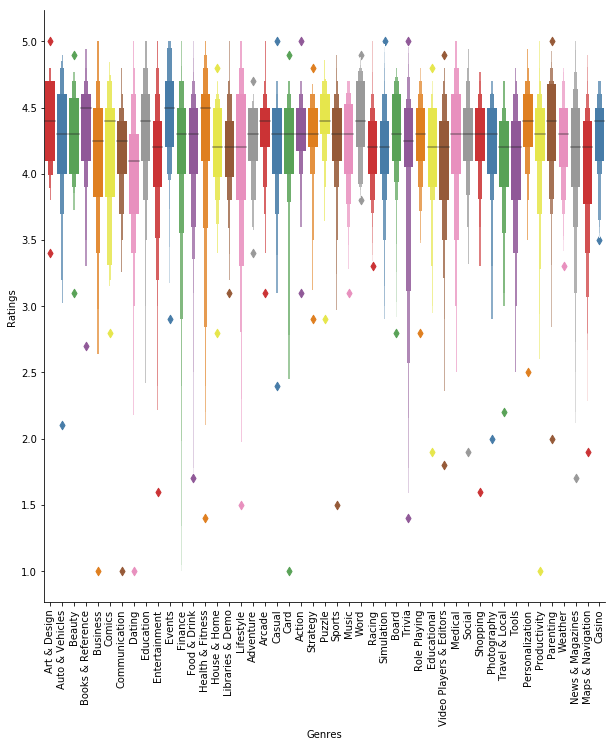

In [505]:
g=sns.catplot(x="Genres",y="Rating",palette="Set1",data=data,kind="boxen",height=9)
g.set_xticklabels(rotation=90)
g.set_ylabels("Ratings")

# last updated

In [506]:
data["Last Updated"].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [507]:
data["Last Updated"].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [508]:
data["Last Updated"].nunique()

1299

"last updated" is in str format and we are unable to plot it with respective rating,so we use date time and let us consider today as last updated,and check whether how long is this app got updated

In [509]:
data["new"] = pd.to_datetime(data["Last Updated"])

In [510]:
data["new"].head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: new, dtype: datetime64[ns]

Now we created a new column named as "new" having datatype as datetime with same data present in "last updated" feature

In [511]:
data["new"].describe()

count                    8886
unique                   1299
top       2018-08-03 00:00:00
freq                      291
first     2010-05-21 00:00:00
last      2018-08-08 00:00:00
Name: new, dtype: object

In [512]:
data["new"].max()

Timestamp('2018-08-08 00:00:00')

Now subtract every record with maximum record, so that we can obtain number of days from last update

In [513]:
data["Last Updated"]=(data["new"]-data["new"].max()).dt.days

In [514]:
data["Last Updated"].head()

0   -213
1   -205
2     -7
3    -61
4    -49
Name: Last Updated, dtype: int64

Data type also got changed to int type,so we can now plot it with now of ratings

Text(0.5, 1.0, 'rating vs last updated(w.r.t days)')

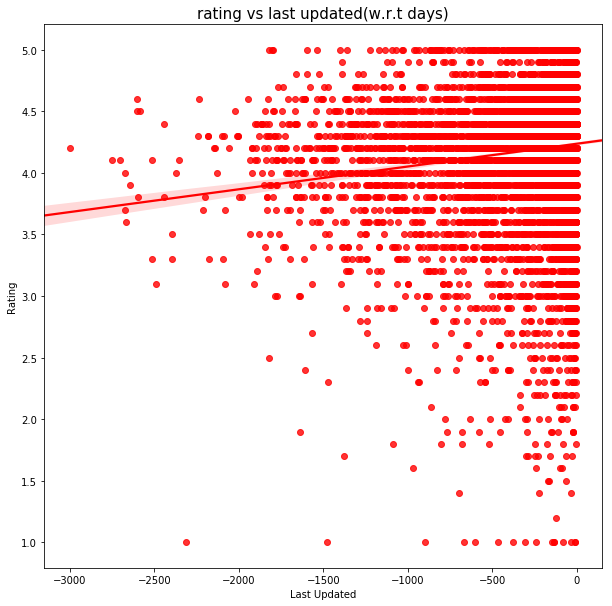

In [515]:
plt.figure(figsize=(10,10))
sns.regplot(x="Last Updated",y="Rating",data=data,color="red")
plt.title("rating vs last updated(w.r.t days)",size=15)

we can infer that recently updated applications are having high average rating i.e(above 4)

In [516]:
data.corr()

,Rating,Reviews,Size,Installs,Price,Last Updated
Rating,1.000000,0.068724,0.078724,0.115513,-0.022371,0.141880
Reviews,0.068724,1.000000,0.131659,0.281803,-0.009562,0.088782
Size,0.078724,0.131659,1.000000,0.294980,-0.026838,0.226257
Installs,0.115513,0.281803,0.294980,1.000000,-0.059151,0.268726
Price,-0.022371,-0.009562,-0.026838,-0.059151,1.000000,-0.001445
Last Updated,0.141880,0.088782,0.226257,0.268726,-0.001445,1.000000


we can directly observe among all other features ratings are having best positive correlation with Last update(i.e 0.1418)

so last update is one of the most important feature that is representing rating of applications

Text(0.5, 1.0, 'installs vs last updated(w.r.t days)')

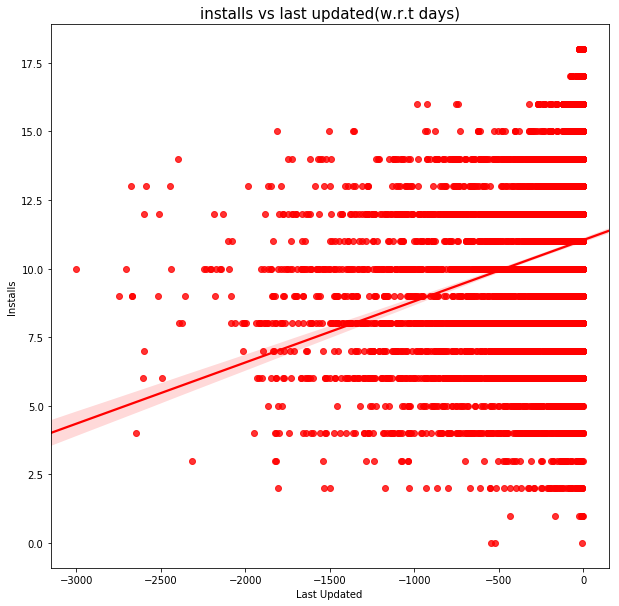

In [517]:
plt.figure(figsize=(10,10))
sns.regplot(x="Last Updated",y="Installs",data=data,color="red")
plt.title("installs vs last updated(w.r.t days)",size=15)

Applications which are recently updated are downloaded more by the users

Text(0.5, 1.0, 'Size vs last updated(w.r.t days)')

<Figure size 720x720 with 0 Axes>

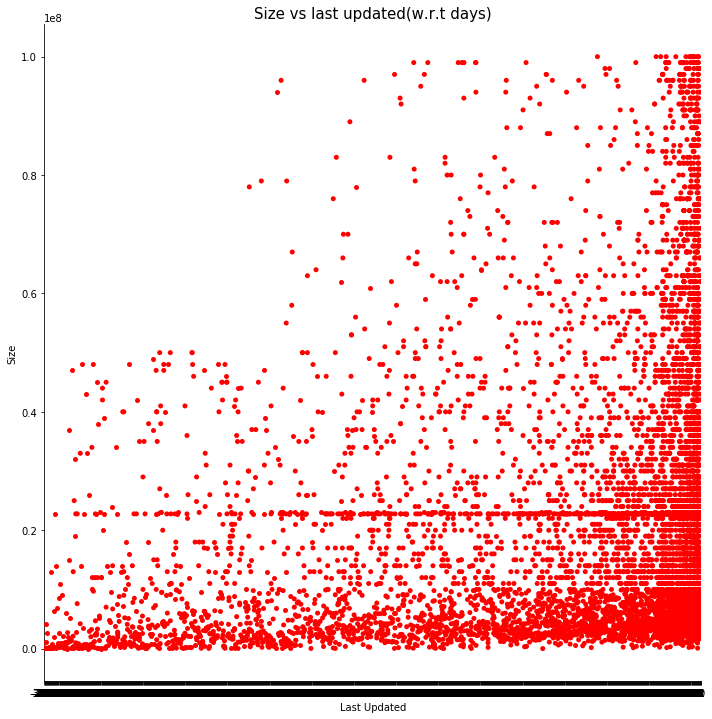

In [518]:
plt.figure(figsize=(10,10))
sns.catplot(x="Last Updated",y="Size",data=data,color="red",height=10)
plt.title("Size vs last updated(w.r.t days)",size=15)

Text(0.5, 1.0, 'size vs last updated(w.r.t days)')

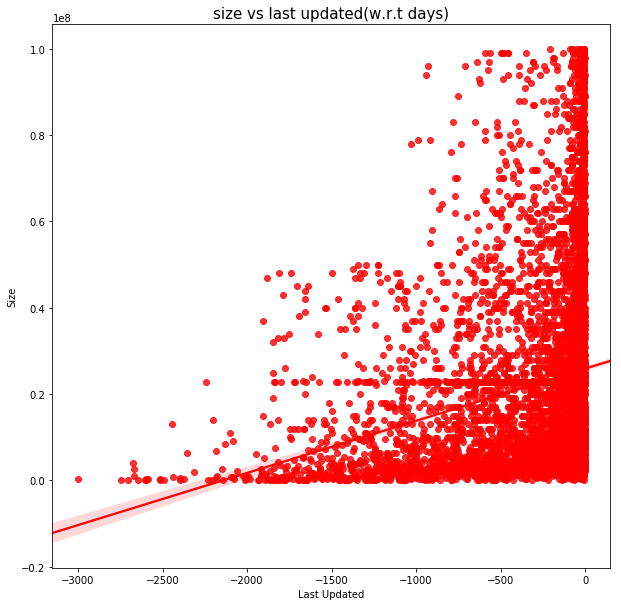

In [519]:
plt.figure(figsize=(10,10))
sns.regplot(x="Last Updated",y="Size",data=data,color="red")
plt.title("size vs last updated(w.r.t days)",size=15)

we can observe that most of the recently updated applications are optimized(reduced the size of applications)

# Insights

1)we are having 93.1% free applications and 6.9% paid applications in googleplaystore

2)Average rating of paid applications is more than free applications

3)Average rating of all applications in playstore is 4.19

4)"Family" and "Game" categories are having more number of applications compared to other categories

5)Average rating among various categories of applications are different(from f-one way anova)

6)Most of the applications in playstore are having reviews than 10M

7)well known applications in playstore are having more reviews,and applications having more revviews are having high rating

8)Most of the apps are sized between 2-30 Mb,neither too light nor too heavy

9)Majority of the paid applications are highly rated and less in size, that means paid apps are designed to meet specific functionality and hence they are not bulky 

10)we are having an average of 17.7M installs for an application which are free,where as 0.11M average installs per application which are paid

11)Average price of each application is $0.96

12)medical applications are most expensive and some medical applications even tend to $80

13)All the game applications except 3 are less than (10$) 

14)personalization,game and family category applictions are having more applications which are very economical (<$2)

15)Users are disappointed for most expensive applications and are rated less(below 4),and applications that are least paid are rated high among all.

16)content rating does not effect the ratings of the applications, but there is a slighty decrease in rating for mature compared to other

17)we are having 4.435 maximum average rating for "events" genre and 3.97 as minimum average rating for "dating" genre

18)Recently updated applications are having high average rating i.e(above 4)

19)Applications which are recently updated are downloaded more by the users

20)recently updated applications are optimized(reduced the size of applications) to make easy for the users to install

# -------------------------------THANK YOU-----------------------------------